In [15]:
#Import de Tensor et vérification de la version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import tensorflow as tf
from pymongo import MongoClient


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import layers

from keras.datasets import mnist



In [2]:

# Connexion à la base de données MongoDB
client = MongoClient("mongodb://localhost:27017")
db = client["DigitRecognizer"]
train_collection_name = "train"
test_collection_name = "test"

# Récupération des données d'entraînement et de test
train_cursor = db[train_collection_name].find()
test_cursor = db[test_collection_name].find()

# Conversion des données en DataFrames pandas
train_data = pd.DataFrame(list(train_cursor), columns=["label"] + [f"pixel{i}" for i in range(784)])

test_data = pd.DataFrame(list(test_cursor), columns=[f"pixel{i}" for i in range(784)])

#Ferme la connexion à Mongo
client.close()



In [3]:
# Diviser les données en features (X) et labels (y)
X = train_data.drop("label", axis=1)
y = train_data["label"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les séries pandas en tableaux NumPy
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialiser le modèle
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

# Compiler le modèle avec l'optimiseur Adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Évaluer le modèle sur l'ensemble de test
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Précision du modèle : {accuracy}")


Epoch 1/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2873 - accuracy: 0.9190 - val_loss: 0.1903 - val_accuracy: 0.9496
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1147 - accuracy: 0.9642 - val_loss: 0.1820 - val_accuracy: 0.9557
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0735 - accuracy: 0.9781 - val_loss: 0.1684 - val_accuracy: 0.9617
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0531 - accuracy: 0.9829 - val_loss: 0.2159 - val_accuracy: 0.9592
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0415 - accuracy: 0.9880 - val_loss: 0.1999 - val_accuracy: 0.9627
Epoch 6/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.1939 - val_accuracy: 0.9646
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.2357 - val_accuracy:

In [4]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")


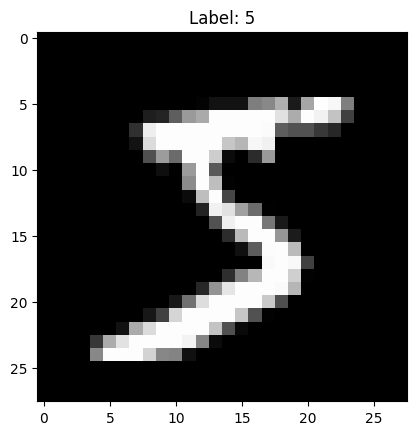

In [17]:
#Question guidées:
# 1) Charger et visualiser les images d'entraînement et de test du jeu de données MNIST dans un notebook ?


# Charger les données d'entraînement et de test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# a. Afficher une image quelconque depuis le train en indiquant comme titre de l'image son label (càd le target associé) ?
plt.imshow(X_train[0], cmap='gray')  # Vous pouvez choisir un autre index si vous le souhaitez
plt.title(f"Label: {y_train[0]}")
plt.show()


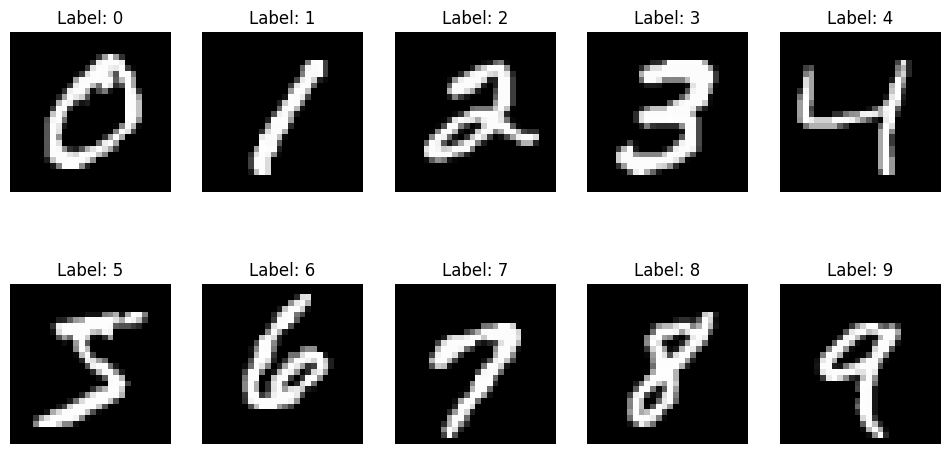

In [13]:

# b. Afficher dans une même figure les chiffres de 0 à 9 ?
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[y_train == i][0], cmap='gray')
    plt.title(f"Label: {i}")
    plt.axis('off')  # Masquer les axes
plt.show()
